<a href="https://colab.research.google.com/github/dlhegend/nigeria-cpi-inflation/blob/main/notebooks/Nigeria_CPI_%26_Inflation_Regime_Shifts_(2019_2025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nigeria CPI & Inflation Dynamics Pre-Covid to Present**



---



**Author:** DOUGLAS, Unyime-Abasi A.

**Data Source:** National Bureau of Statistics (NBS)



---



## **Study Objectives:**

- **Quantify and Identify Inflation Shocks:** Systematically detect and quantify periods of statistically significant, anomalous acceleration and deceleration `(YoY changes)` in Nigeria's CPI inflation rate. Use the Median Absolute Deviation `(MAD)` as a robust statistical threshold to objectively distinguish meaningful inflation shocks from normal volatility and moving beyond subjective level-based analysis.

- **Analyze Causal Attribution and Regimes:** Investigate and attribute the underlying drivers—classifying them as `policy-driven` (e.g., subsidy reforms, FX liberalization, monetary tightening), `structural` (e.g., insecurity, food supply shocks), `global` (e.g., war, commodity price spikes), or `statistical` (e.g., base effects, CPI rebasing)—responsible for these sharp inflation movements across distinct episodes (2020–2025).

- **Assess Policy Efficacy and Drivers:** Distinguish between cost-push `(supply-side)` and demand-pull `(monetary/currency devaluation)` inflationary forces. Evaluate the effectiveness of monetary and fiscal policy responses (2023–2025) in transitioning the economy from hyper-acceleration to statistical disinflation, and reveal recurring structural vulnerabilities.

- **Provide Policy-Relevant Insights:** Offer a data-driven historical narrative emphasizing the role of short-term shocks, base effects, and seasonal factors in `headline inflation` trends to inform future policy interventions and stabilization efforts.


---



## **Data Loading**

In [ ]:
# Import necessary libraries for data exploration and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read file to df and view first and last 5 rows

file_path = "/content/drive/MyDrive/DSCR/Dataset/py_pj/cpi_25.xlsx"

df = pd.read_excel(file_path, sheet_name='composite_cpi')
df.head()

,Year,Month,All Items,All Items less Farm Produce.,All Items less Farm Produce. and Energy,Imported Food,Food,FARM PRODUCE,ENERGY,SERVICES,...,Transport,INFORMATION AND COMMUNICATION,"RECREATION, SPORT AND CULTURE",EDUCATION SERVICES,RESTAURANTS AND ACCOMODATION SERVICES,Insurance and Financial Services,"PERSONAL CARE, SOCIAL PROTECTION AND MISCELLANEOUS GOODS AND SERVICES",Month-on (%),Year-on (%),12-month average (%)
0,2019,Jan,37.219391,44.321935,43.647598,36.391831,32.052770,NaN,NaN,NaN,...,41.452668,64.596779,56.107801,48.334366,44.492325,NaN,45.494809,0.737848,11.374083,11.801037
1,2019,Feb,37.491129,44.611420,43.951264,36.837160,32.315170,NaN,NaN,NaN,...,41.735098,64.983227,56.452198,48.668832,44.778718,NaN,45.798026,0.730099,11.305853,11.564474
2,2019,Mar,37.786034,44.847803,44.199083,37.284990,32.598882,NaN,NaN,NaN,...,42.022540,65.379197,56.803309,48.985164,45.055397,NaN,46.085919,0.786599,11.251150,11.400723
3,2019,Apr,38.142788,45.161268,44.502749,37.747831,32.969249,NaN,NaN,NaN,...,42.321272,65.789229,57.173642,49.315600,45.334535,NaN,46.390956,0.944142,11.372068,11.314474
4,2019,May,38.566692,45.498715,44.864006,38.219429,33.434421,NaN,NaN,NaN,...,42.634612,66.224738,57.564997,49.666185,45.628945,NaN,46.740189,1.111361,11.396405,11.298689


In [ ]:
df.tail()

,Year,Month,All Items,All Items less Farm Produce.,All Items less Farm Produce. and Energy,Imported Food,Food,FARM PRODUCE,ENERGY,SERVICES,...,Transport,INFORMATION AND COMMUNICATION,"RECREATION, SPORT AND CULTURE",EDUCATION SERVICES,RESTAURANTS AND ACCOMODATION SERVICES,Insurance and Financial Services,"PERSONAL CARE, SOCIAL PROTECTION AND MISCELLANEOUS GOODS AND SERVICES",Month-on (%),Year-on (%),12-month average (%)
79,2025,August,126.786490,126.120000,126.743876,120.01104,129.366544,128.216899,120.409305,128.241956,...,125.078488,125.826292,110.564150,123.147686,129.920931,114.208446,134.353983,0.744132,20.124245,24.659173
80,2025,September,127.700000,127.780000,128.540000,124.07000,127.330000,127.340000,119.840000,129.740000,...,126.209985,126.388095,111.731672,126.439491,130.043288,113.164904,134.514524,0.720511,18.016369,23.456507
81,2025,October,128.890000,129.480000,130.360000,124.50000,126.860000,127.340000,120.350000,131.710000,...,129.890000,127.070000,112.630000,127.420000,132.770000,115.100000,136.770000,0.931872,16.052782,22.015725
82,2025,November,130.466156,131.120365,132.027658,125.25000,128.290000,128.320000,121.650000,134.050000,...,133.710000,127.228800,114.410000,127.450000,135.630000,115.310000,139.010000,1.222869,14.452582,20.409262
83,2025,December,131.170000,132.100000,132.790000,128.72000,127.830000,127.800000,124.980000,134.250000,...,133.870000,126.480000,116.860000,128.150000,136.190000,115.550000,139.110000,0.540000,15.150000,23.010000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 30 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Year                                                                   84 non-null     int64  
 1   Month                                                                  84 non-null     object 
 2   All Items                                                              84 non-null     float64
 3   All Items less Farm Produce.                                           84 non-null     float64
 4   All Items less Farm Produce. and Energy                                84 non-null     float64
 5   Imported Food                                                          84 non-null     float64
 6   Food                                                                   84 non-null     float

**Observation:**

The data shows the Consumer-Price-Index values for several sectors


---



**We** are interested in the All Items CPI, the 12-month average, Month-over-Month, and Year-over-Year change

In [ ]:
# Create a new dataframe for selected columns

df2 = df[['Year', 'Month', 'All Items', 'Month-on (%)', 'Year-on (%)', '12-month average (%)']].copy()
df2.head()

,Year,Month,All Items,Month-on (%),Year-on (%),12-month average (%)
0,2019,Jan,37.219391,0.737848,11.374083,11.801037
1,2019,Feb,37.491129,0.730099,11.305853,11.564474
2,2019,Mar,37.786034,0.786599,11.251150,11.400723
3,2019,Apr,38.142788,0.944142,11.372068,11.314474
4,2019,May,38.566692,1.111361,11.396405,11.298689


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  84 non-null     int64  
 1   Month                 84 non-null     object 
 2   All Items             84 non-null     float64
 3   Month-on (%)          84 non-null     float64
 4   Year-on (%)           84 non-null     float64
 5   12-month average (%)  84 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.1+ KB


**Observation:**

No null values in selected columns


---



In [ ]:
df2.drop(columns='Year').describe()

,All Items,Month-on (%),Year-on (%),12-month average (%)
count,84.000000,84.000000,84.000000,84.000000
mean,71.188201,1.538864,19.567787,19.141893
std,29.371371,1.935612,6.965300,6.703844
min,37.219391,-12.274121,11.015909,11.267917
25%,46.211599,1.024651,14.101214,12.607924
50%,61.828970,1.538553,17.841920,16.968586
75%,94.994198,1.954699,23.024337,24.175775
max,131.170000,10.680000,34.598334,32.771514




---



## **Data Editing**

**We** begin creating a new date column to set as index

In [ ]:
df2.Month.value_counts()

,count
Month,
Jan,7
Feb,7
Mar,7
Apr,7
May,7
Jun,6
Jul,6
Aug,6
Sep,6


In [ ]:
month_mapping = {'Jan': 1, 'January': 1,
                 'Feb': 2, 'February': 2,
                 'Mar': 3, 'March': 3,
                 'Apr': 4, 'April': 4,
                 'May': 5,
                 'Jun': 6, 'June': 6,
                 'Jul': 7, 'July': 7,
                 'Aug': 8, 'August': 8,
                 'Sep': 9, 'September': 9,
                 'Oct': 10, 'October': 10,
                 'Nov': 11, 'November': 11,
                 'Dec': 12, 'December': 12,
                 }

df2['Month'] = df2['Month'].map(month_mapping)
df2.Month.value_counts()

,count
Month,
1,7
2,7
3,7
4,7
5,7
6,7
7,7
8,7
9,7


In [ ]:
# Create a date column for proper time-series handling

df2['Date'] = df2['Year'].astype(str) + '-' + df2['Month'].astype(str) + '-01'
df2['Date'] = pd.to_datetime(df2['Date'])
df2.drop(['Year', 'Month'], axis=1, inplace=True)
df2 = df2.set_index('Date')
df2

,All Items,Month-on (%),Year-on (%),12-month average (%)
Date,,,,
2019-01-01,37.219391,0.737848,11.374083,11.801037
2019-02-01,37.491129,0.730099,11.305853,11.564474
2019-03-01,37.786034,0.786599,11.251150,11.400723
2019-04-01,38.142788,0.944142,11.372068,11.314474
2019-05-01,38.566692,1.111361,11.396405,11.298689
...,...,...,...,...
2025-08-01,126.786490,0.744132,20.124245,24.659173
2025-09-01,127.700000,0.720511,18.016369,23.456507
2025-10-01,128.890000,0.931872,16.052782,22.015725




---



## **Data Visualization**

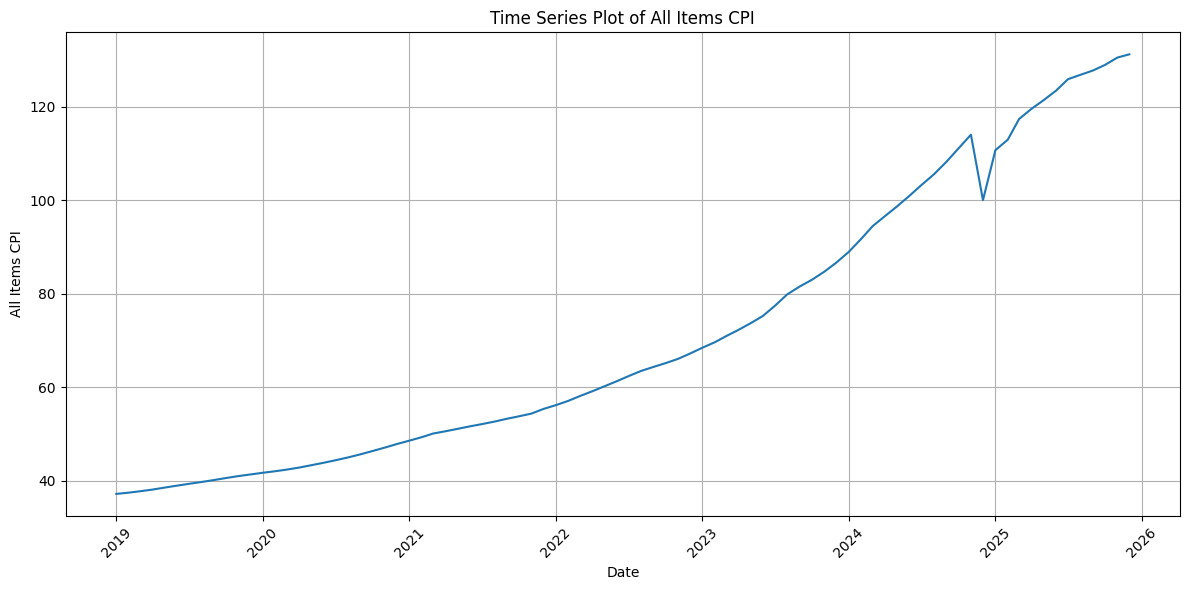

In [ ]:
# Visualize time-series of All Items CPI

plt.figure(figsize=(12, 6))
sns.lineplot(data=df2, x=df2.index, y='All Items')
plt.title('Time Series Plot of All Items CPI')
plt.xlabel('Date')
plt.ylabel('All Items CPI')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation:**

- There is an accelerated increase in the `All Items` CPI

- The slope increases in steepness until late 2024

- There is a sharp disinflation before 2025 then a corresponding increase.


---



*To analyse this disinflation is a major goal of this research*

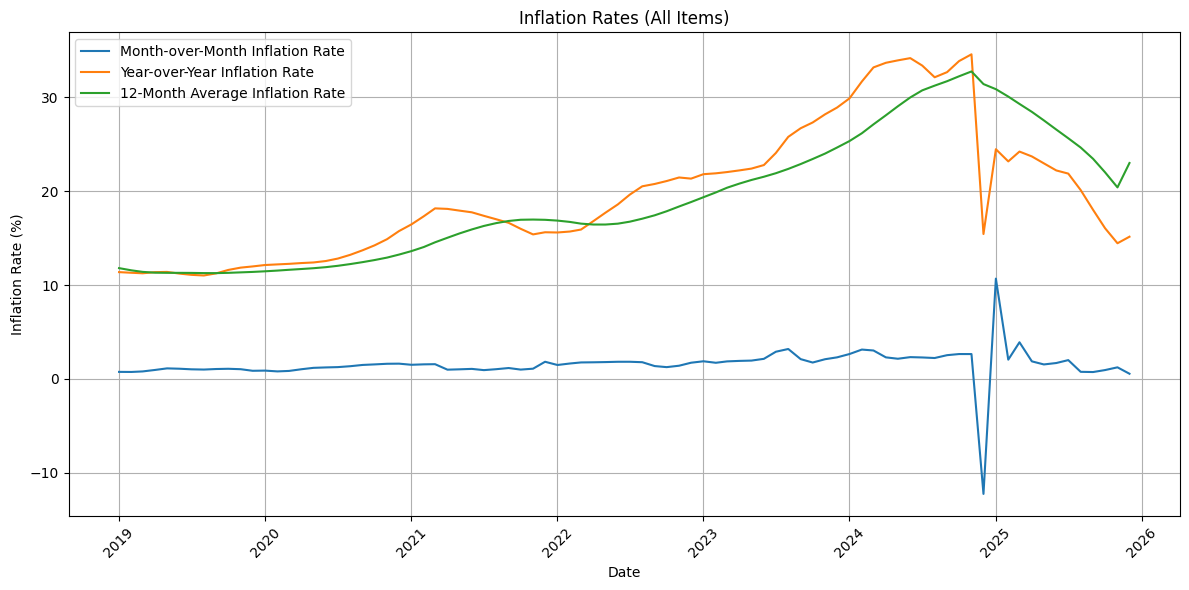

In [ ]:
# Visualize inflation rate changes

plt.figure(figsize=(12, 6))
sns.lineplot(data=df2, x=df2.index, y='Month-on (%)', label='Month-over-Month Inflation Rate')
sns.lineplot(data=df2, x=df2.index, y='Year-on (%)', label='Year-over-Year Inflation Rate')
sns.lineplot(data=df2, x=df2.index, y='12-month average (%)', label='12-Month Average Inflation Rate')
plt.title('Inflation Rates (All Items)')
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



---


**We** will continue this analysis with the Year-on-Year percentage change `(YoY (%))` which captures long-term inflation trends.


---


YoY inflation rate change in CPI data means the percentage change in the Consumer Price Index compared to the same month one year earlier.

Put simply:

> It tells you how much prices have increased (or decreased) over 12 months.

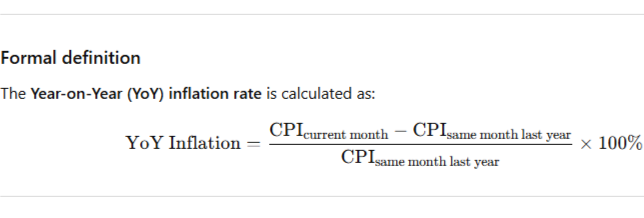

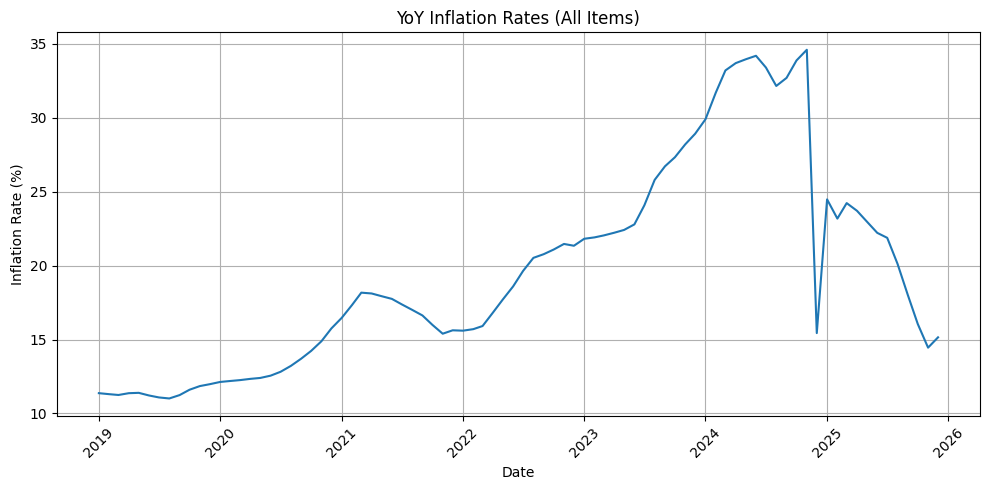

In [ ]:
# Visualize inflation rate changes with YoY (%)

plt.figure(figsize=(10, 5))
sns.lineplot(data=df2, x=df2.index, y='Year-on (%)')
plt.title('YoY Inflation Rates (All Items)')
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



---



## **Feature Engineering**

In [ ]:
''' Create a new column for the difference between successive YoY (%)
We will use this difference to identify slope changes '''

df2['YoY_change'] = df2['Year-on (%)'].diff()
df2[['Year-on (%)', 'YoY_change']].head()

,Year-on (%),YoY_change
Date,,
2019-01-01,11.374083,NaN
2019-02-01,11.305853,-0.068230
2019-03-01,11.251150,-0.054703
2019-04-01,11.372068,0.120918
2019-05-01,11.396405,0.024337


In [ ]:
df2[['YoY_change']].describe()

,YoY_change
count,83.000000
mean,0.045493
std,2.460597
min,-19.161162
25%,-0.127352
50%,0.212707
75%,0.705189
max,9.042178


**Observation:**

The `min` and `max` values are extreme compared to the `IQR`


---



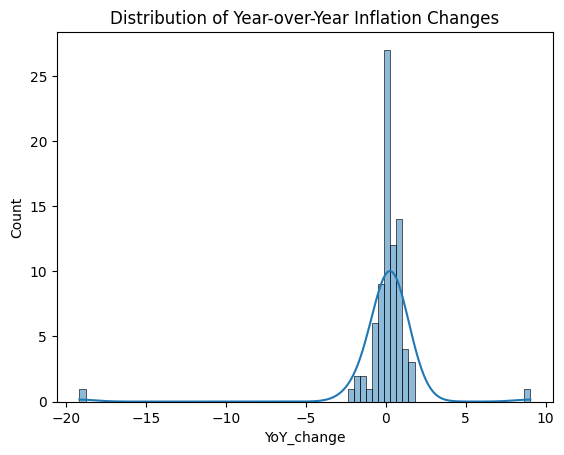

In [ ]:
# Visualize distribution of YoY_change

sns.histplot(df2['YoY_change'], kde=True)
plt.title('Distribution of Year-over-Year Inflation Changes')
plt.show()

**Observation:**

The distribution is almost normal except the extreme values to the left and right which represent super sharp decrease and increase respectively in the `YoY (%)`


---



**To** identify points as sharp changes in inflation rate, we have chosen the Median Absolute Derivative `(MAD)` method. This is more robust to extreme values

In [ ]:
inflation_rate_change = df2['YoY_change']

# 1. Calculate the median of the 'YoY_change' column
median_yoy_change = inflation_rate_change.median()

# 2. Calculate the absolute difference from the median
absolute_deviations = (inflation_rate_change - median_yoy_change).abs()

# 3. Calculate the Median Absolute Deviation (MAD)
mad_yoy_change = absolute_deviations.median()

# 4. Define upper and lower thresholds
upper_threshold = median_yoy_change + 1 * mad_yoy_change
lower_threshold = median_yoy_change - 1 * mad_yoy_change

print(f"Median of YoY_change: {median_yoy_change:.2f}")
print(f"Median Absolute Deviation (MAD) of YoY_change: {mad_yoy_change:.2f}")
print(f"Upper threshold for sharp change: {upper_threshold:.2f}")
print(f"Lower threshold for sharp change: {lower_threshold:.2f}")

Median of YoY_change: 0.21
Median Absolute Deviation (MAD) of YoY_change: 0.40
Upper threshold for sharp change: 0.61
Lower threshold for sharp change: -0.18


In [ ]:
sharp_increases = inflation_rate_change[inflation_rate_change > upper_threshold]
sharp_decreases = inflation_rate_change[inflation_rate_change < lower_threshold]

print("Periods of sharp increases in inflation rate (using MAD thresholds):")
print(sharp_increases)

print("\nPeriods of sharp decreases in inflation rate (using MAD thresholds):")
print(sharp_decreases)

Periods of sharp increases in inflation rate (using MAD thresholds):
Date
2020-11-01    0.654518
2020-12-01    0.866126
2021-01-01    0.712961
2021-02-01    0.868549
2021-03-01    0.836471
2022-04-01    0.903659
2022-05-01    0.892987
2022-06-01    0.883816
2022-07-01    1.047404
2022-08-01    0.881822
2023-07-01    1.290066
2023-08-01    1.718286
2023-09-01    0.917991
2023-10-01    0.613890
2023-11-01    0.870453
2023-12-01    0.721615
2024-01-01    0.977269
2024-02-01    1.799174
2024-03-01    1.503200
2024-10-01    1.180597
2024-11-01    0.721461
2025-01-01    9.042178
2025-03-01    1.047733
2025-12-01    0.697418
Name: YoY_change, dtype: float64

Periods of sharp decreases in inflation rate (using MAD thresholds):
Date
2021-07-01    -0.373657
2021-08-01    -0.367974
2021-09-01    -0.379259
2021-10-01    -0.636287
2021-11-01    -0.597878
2024-07-01    -0.796420
2024-08-01    -1.245120
2024-12-01   -19.161162
2025-02-01    -1.299105
2025-04-01    -0.519487
2025-05-01    -0.736123
20

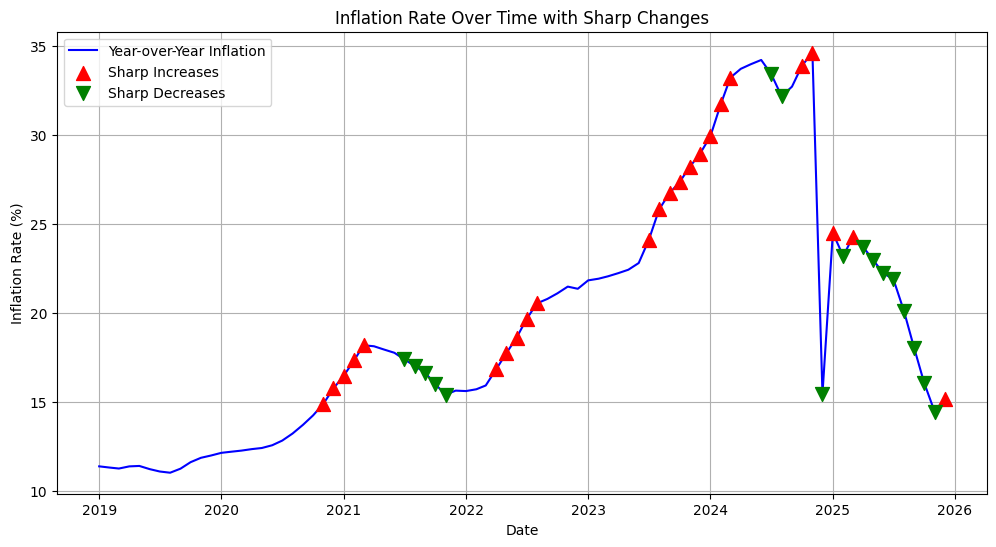

In [ ]:
# Visualize YoY inflation rates highlighting dates of sharp changes for ease

plt.figure(figsize=(12, 6))
plt.plot(df2.index, df2['Year-on (%)'], label='Year-over-Year Inflation', color='blue')

# Highlight sharp increases

plt.scatter(sharp_increases.index, df2['Year-on (%)'].loc[sharp_increases.index],
            color='red', marker='^', s=100, label='Sharp Increases', zorder=5)

# Highlight sharp decreases

plt.scatter(sharp_decreases.index, df2['Year-on (%)'].loc[sharp_decreases.index],
            color='green', marker='v', s=100, label='Sharp Decreases', zorder=5)


plt.title('Inflation Rate Over Time with Sharp Changes')
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.legend()
plt.show()

## **Reports**

### **Epochs of Sharp Increases in Inflation Rate**


---



1. `Nov 2020 – March 2021:` Headline inflation surged above **18% (four-year high),** driven by:

- **Land Border Closure:** The 2019–2020 closure created severe supply shortages, particularly for staples like rice, causing persistent price hikes with lingering effects.

- **Naira Devaluation & FX Scarcity:** Depleted oil reserves, high government borrowing ("Ways and Means" advances), and subsequent naira weakening increased costs for imported goods, fuel, and agricultural inputs (cost-push/"imported" inflation).

- **Petrol Price Deregulation:** Removal of fuel subsidies (Sept 2020) raised pump prices, escalating transportation costs and amplifying food price inflation.

- **Electricity Tariff Hikes:** Increases (late 2020) raised manufacturing production expenses, passed on as higher consumer household costs.

- **Seasonal & Demand Pressures:** Elevated festive spending, coupled with supply disruptions from COVID-19 restrictions and #EndSARS protests (Oct 2020), accelerated price rises as supply lagged pent-up demand.

- **Food Supply Shocks:** Insecurity in farming regions and prior flooding reduced harvests, pushing food inflation (the main CPI driver) above 22% in early 2021.

2. `April - August 2022` Key drivers of **17-year high headline inflation (20.52%):**

- **Global Commodity Shock:** Russia-Ukraine war fallout drove up prices for imported energy (diesel, jet fuel), food commodities (wheat, oils), and fertilizers.

- **Naira Devaluation:** Persistent currency weakening amplified import costs for food, refined fuel, and industrial inputs, fueling broad-based cost-push inflation.

- **Domestic Supply Constraints:** Worsening insecurity (banditry, kidnapping, clashes) limited farming activities in northern/central regions, causing a food supply shock that kept food inflation above 23%.

- **High Energy/Transport Costs:** Reliance on imported diesel and global oil volatility increased transportation costs, further raising food and other prices.

- **Monetary Expansion:** Financing the government's fiscal deficit through Central Bank "Ways and Means" lending increased the money supply, cited as a foundational inflationary driver.

- **Pre-Election Liquidity:** Increased political spending ahead of the 2023 elections added to overall liquidity and upward price pressure.

- **Specific Price Surges:** Notable price hikes in bread, cereals, gas, oil/fats, garments, and cleaning materials drove the Consumer Price Index (CPI) upward.

3. `July 2023 - Nov 2024:` **Peak Inflation (Over 34%)** primarily driven by:

- **Fuel Subsidy Removal (June 2023):** Tripled petrol prices, significantly increasing transportation, production, and energy costs.

- **Exchange Rate Unification/Naira Devaluation (June 2023):** Floating the Naira led to devaluation, sharply raising import costs for goods, fuel, and agricultural inputs.

- **Agricultural Disruptions:** Ongoing insecurity, high input costs, and severe flooding in 2023-2024 limited farming activities, driving food inflation to a staggering 40.9% by mid-2024.

- **Surging Food Prices:** Sharp rises in staples (yam, rice, maize, etc.) were the primary contributor to CPI increases, accelerating notably in late 2024.

- **Electricity Tariff Hikes:** Early 2024 tariff increases for "Band A" customers raised business overheads and consumer prices.

- **Monetary Factors:** High liquidity from past "Ways and Means" financing continued to pressure prices despite aggressive CBN interest rate hikes.


---




### **Epochs of Sharp Decreases in Inflation Rate**


---



1. `July to November 2021:` The disinflationary period was primarily driven by statistical comparisons **(Base Effect)** and seasonal factors, not an actual broad decline in prices or aggressive policy tightening:

- **Base Effect:** High inflation in mid-2020 (due to COVID-19 and devaluation) created higher comparison bases, making 2021's year-on-year growth appear smaller.

- **Harvest Season:** Increased local supply of staples in Q3/Q4 eased pressure on food prices (the largest CPI component).

- **Supply Chain Stabilization:** Post-border reopening, supply chains normalized by H2 2021, easing scarcity for goods like rice.

- **Reduced Disruptions:** Easing COVID-19 restrictions allowed for more stable domestic production and distribution.

- **Naira Stability:** Fewer aggressive devaluations compared to 2020 limited imported inflation and fuel cost pass-through.

- **Consumer Price Resistance:** Severely eroded purchasing power led to reduced demand for non-essentials, forcing some retailers to slow price increases.

- **Policy Stance:** The CBN maintained steady interest rates, balancing growth recovery with liquidity management.

- **Fuel Subsidy:** Effective PMS subsidies contained transport and energy costs, limiting cost-push inflation.

2. `July to Dec 2024:` a unique disinflation; **a "turning point"** driven by policy interventions, seasonal harvests, and major methodological updates. This deceleration was statistical and structural, not an economic collapse driven by:

- **High Base Effects:** Inflation surges from 2023 reforms (fuel subsidy, exchange rate unification) created high comparison bases, leading to significant year-on-year statistical deceleration, especially in December.

- **2024 CPI Rebasing:** The most dramatic drop (Dec 2024) resulted primarily from the National Bureau of Statistics (NBS) updating the Consumer Price Index base year from 2009 to 2024, technically recalibrating the "headline" inflation percentage lower.

- **Peak Harvest & Food Security Interventions:** Abundant wet season yields (maize, rice, yam) and government policies (zero tariffs, grain reserves, subsidized fertilizer) sharply increased supply, providing a natural brake and strong downward pressure on food inflation (the largest CPI component) from July onward.

- **Aggressive Monetary Tightening:** The Central Bank of Nigeria (CBN) consistently raised the Monetary Policy Rate (MPR)—reaching 27.25%—throughout 2024, compressing demand and stabilizing the Naira, which slowed the rate of price growth.

- **Naira Stabilization:** Improved FX inflows and tighter central bank controls led to periods of relative exchange rate stability in the latter half of the year, reducing cost-push inflation from imported goods and fuel.

3. `Feb to Nov 2025:` This trend was driven by aggressive monetary policies, major statistical recalibrations, and strong economic fundamentals such as:

- **High Base Effects:** Elevated inflation peaks from the 2023-2024 fuel subsidy removal and naira float created very high comparison bases (near 35%), which mechanically resulted in a lower year-on-year percentage increase.

- **Bumper Agricultural Output:** Strong consecutive harvests, backed by favourable rainfall and expanded government programs, flooded markets, causing a sustained decline in food inflation from early 2025.

- **Naira Strength & Forex Stability:** Increased oil earnings, record remittances, FDI, and tighter CBN forex management significantly strengthened the naira, substantially reducing imported inflation pressures.

- **Sustained Monetary Tightening:** The CBN maintained historic high interest rates (MPR around 27-28%) and liquidity controls, successfully anchoring inflation expectations and slowing core inflation momentum.

- **Expanded Food Security:** A combination of zero-duty imports, strategic grain releases, improved rural security, and better logistics kept downward pressure on food prices.

- **Statistical Rebasing:** The full implementation of the new Consumer Price Index (CPI) base year (2024 = 100), replacing the obsolete 2009 basket, better reflected current consumption and technically lowered the reported inflation growth rate.

- **Domestic Refining Impact:** Ramping up production at the Dangote and local modular refineries began to reduce fuel and petroleum product prices in July 2025, which lowered logistics and transportation costs reflected in the "All Items" CPI.


---



## **Conclusion**

> The Nigerian economy's inflation trajectory from `2020 to 2025` represents one of its most tumultuous periods, characterized by sharp volatility driven by a complex interplay of ***policy shocks, structural weaknesses, and external pressures.*** While short-term measures and statistical effects—such as ***the high base effect and CPI rebasing*** in late 2025—delivered episodic relief and an eventual "cooling" of the official inflation rate, a critical analysis reveals a more precarious reality.

>The disinflation observed in 2025 largely signifies prices rising at a slower pace from an already historic and unsustainable peak, rather than an outright reduction in the punishing cost of living for the average Nigerian. This period underscores a profound structural fragility: ***inflation is not purely a monetary phenomenon, but one deeply rooted in issues of insecurity, poor infrastructure, energy dependency, and an import-reliant economy.***

>The necessary but poorly cushioned `"twin pillars"` of 2023 reforms—***fuel subsidy removal and Naira flotation***—acted as a severe shock, highlighting a critical lesson: ***macroeconomic corrections without robust social safety nets inflict a heavy human cost.*** The recurring drivers of inflation, including ***Naira devaluation, insecurity in the food belt, and global commodity shocks,*** confirm that monetary tightening by the CBN cannot sustainably solve inflation if the underlying issues of productivity, energy supply (refinery output), and security are not fundamentally addressed.

>Ultimately, the `2020–2025` period was a ***stress test*** that the economy narrowly survived. Sustained price stability is conditional, depending not just on consistent and credible monetary and fiscal policies, but crucially on deeper reforms: ***enhancing agricultural productivity, diversifying the economic base, and resolving infrastructure and insecurity bottlenecks.*** The transition into 2026 suggests a shift toward stability, yet this stability remains acutely sensitive to both policy inconsistency and unavoidable external shocks, emphasizing the need for proactive, resilience-building strategies.


---



## **Future Directions:**

- **Granular Sectoral Decomposition:** Disaggregate the CPI components, applying the MAD-based framework separately to Food, Core (Non-Food), Energy, and Transport inflation. This will isolate sector-specific transmission channels, identify which sub-index acts as the "lead indicator" for headline shocks, and improve policy targeting.

- **Advanced Econometric Modeling & Causality:** Extend the analysis using advanced techniques such as Structural VAR (SVAR), local projection methods, or regime-switching models to formally quantify the causal impact of key drivers (FX volatility, fuel prices, food supply shocks, and monetary policy) and explicitly model structural breaks (e.g., due to FX liberalization, subsidy removal).

- **Integrate Momentum and Exchange Rate Dynamics:** Incorporate month-on-month (MoM) inflation dynamics alongside YoY analysis to better separate genuine price pressures from base effects. Conduct a granular time-series analysis to determine the precise lead-lag relationship between parallel market Naira depreciation and subsequent inflation spikes.

- **Develop Predictive Early-Warning Systems:** Leverage the identified historical shock patterns and leading indicators (e.g., PMI, forex reserves, climate forecasts) to build a machine learning model (e.g., LSTM or ARIMA) capable of forecasting potential "sharp increase" turning points in real-time inflation momentum.

- **Comparative & Long-Term Context:** Benchmark Nigeria's inflation volatility against peer African or emerging-market economies using the same framework to identify transferable policy lessons. Monitor the long-term impact (2026 AD onward) of the 2024 CPI rebasing to assess its accuracy in reflecting the cost of living for different income deciles.


---

